＃參考p18_d_1_train_zheng_tcell_dataset_from_actinn_paper

# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# read in files

# CD14_Monocytes 

In [3]:
#read in files
CD14_Monocytes = pd.read_hdf("CD14_Monocytes.h5", key="dge")
CD14_Monocytes 

,AAACATACCACTAG-1,AAACATACGTTCAG-1,AAACATTGACGGTT-1,AAACATTGCTTCGC-1,AAACATTGGGCAAG-1,AAACATTGTTTGTC-1,AAACGCACGGACTT-1,AAACGGCTACGGAG-1,AAACGGCTAGTCAC-1,AAACGGCTCAGCTA-1,...,TTTCAGTGTCCTGC-1,TTTCAGTGTGTGCA-1,TTTCCAGAATTCGG-1,TTTCCAGATTGCGA-1,TTTCGAACACAGCT-1,TTTCGAACGCTAAC-1,TTTCGAACTCCTGC-1,TTTGACTGAGTAGA-1,TTTGACTGTGTAGC-1,TTTGCATGTCACCC-1
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000938,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ENSG00000000971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
CD14_Monocytes.shape

(14175, 2612)

In [5]:
monocyte_cell_no  = ["mono_"+ str(i)  for i in range(CD14_Monocytes.shape[1])]
len(monocyte_cell_no)

2612

# CD19_B_Cells

In [6]:
CD19_B_Cells= pd.read_hdf("CD19_B_Cells.h5", key="dge")

In [7]:
CD19_B_Cells_no  = ["B_"+ str(i)  for i in range(CD19_B_Cells.shape[1])]
len(CD19_B_Cells_no)

10085

# CD34_cells (不使用)

CD34_cells= pd.read_hdf("CD34_Cells.h5", key="dge")

CD34_cells_no  = ["CD34_"+ str(i)  for i in range(CD34_cells.shape[1])]
len(CD34_cells_no)


# Regulatory_T_Cells

In [8]:
Regulatory_T_Cells = pd.read_hdf("CD4_25_Regulatory_T_Cells.h5", key="dge")

In [9]:
Regulatory_T_Cells_no  = ["Regulatory_T_"+ str(i)  for i in range(Regulatory_T_Cells.shape[1])]
len(Regulatory_T_Cells_no)


10263

# Naive_T_Cells

In [10]:
Naive_T_Cells= pd.read_hdf("CD4_45RA_25_Naive_T_cells.h5", key="dge")

In [11]:
Naive_T_Cells_no = ["Naive_T_"+ str(i)  for i in range(Naive_T_Cells.shape[1])]
len(Naive_T_Cells_no)

10479

# Memory_T_Cells

In [12]:
Memory_T_Cells= pd.read_hdf("CD4_CD45RO_Memory_T_Cells.h5", key="dge")

In [13]:
Memory_T_Cells_no = ["Naive_T_"+ str(i)  for i in range(Memory_T_Cells.shape[1])]
len(Memory_T_Cells_no)

10224

# Helper T cells

In [14]:
Helper_T_Cells= pd.read_hdf("CD4_Helper_T_Cells.h5", key="dge")

In [15]:
Helper_T_Cells_no = ["Helper_T_"+ str(i)  for i in range(Helper_T_Cells.shape[1])]
len(Helper_T_Cells_no)

11213

# Natural_Killer_Cells

In [16]:
Natural_Killer_Cells= pd.read_hdf("CD56_Natural_Killer_Cells.h5", key="dge")

In [17]:
Natural_Killer_Cells_no = ["Natural_Killer_"+ str(i)  for i in range(Natural_Killer_Cells.shape[1])]
len(Natural_Killer_Cells_no)

8385

# Naive_Cytotoxic_T_Cells

In [18]:
Naive_Cytotoxic_T_Cells = pd.read_hdf("CD8_CD45RA_Naive_Cytotoxic_T_Cells.h5", key="dge")

In [19]:
Naive_Cytotoxic_T_Cells_no = ["Naive_Cytotoxic_T_"+ str(i)  for i in range(Naive_Cytotoxic_T_Cells.shape[1])]
len(Naive_Cytotoxic_T_Cells_no)

11953

# Cytotoxic_T_Cells

In [20]:
Cytotoxic_T_Cells = pd.read_hdf("CD8_Cytotoxic_T_cells.h5", key="dge")

In [21]:
Cytotoxic_T_Cells_no = ["Cytotoxic_T_"+ str(i)  for i in range(Cytotoxic_T_Cells.shape[1])]
len(Cytotoxic_T_Cells_no)

10209

# 合併Regulatory_T_Cells and helper T

In [22]:
Helper_T_Cells

,AAACATACAACGAA-1,AAACATACAGGTTC-1,AAACATACCCTTGC-1,AAACATACGCGATT-1,AAACATACGGAGGT-1,AAACATACTCGTAG-1,AAACATACTGACAC-1,AAACATACTGCAGT-1,AAACATACTGCCTC-1,AAACATTGATTGGC-1,...,TTTGACTGTGGAAA-1,TTTGCATGACCTAG-1,TTTGCATGACTGTG-1,TTTGCATGAGCGGA-1,TTTGCATGCTTGAG-1,TTTGCATGGGAACG-1,TTTGCATGGGGACA-1,TTTGCATGTCCTTA-1,TTTGCATGTGCAAC-1,TTTGCATGTTTGGG-1
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
Regulatory_T_Cells

,AAACATACAAAACG-1,AAACATACACGACT-1,AAACATACACTTTC-1,AAACATACCCTCGT-1,AAACATACGCTTAG-1,AAACATACGGGTGA-1,AAACATACGGTGAG-1,AAACATACTGCAAC-1,AAACATTGAACGTC-1,AAACATTGACCAGT-1,...,TTTGACTGCTCTAT-1,TTTGACTGGCGAAG-1,TTTGACTGTAGAGA-1,TTTGACTGTCAAGC-1,TTTGACTGTCAGGT-1,TTTGCATGAGAATG-1,TTTGCATGCCTCGT-1,TTTGCATGTAACCG-1,TTTGCATGTGCAGT-1,TTTGCATGTTGTCT-1
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
regulatory_helper_T = pd.concat([Regulatory_T_Cells, Helper_T_Cells], axis=1, join='inner')
regulatory_helper_T

,AAACATACAAAACG-1,AAACATACACGACT-1,AAACATACACTTTC-1,AAACATACCCTCGT-1,AAACATACGCTTAG-1,AAACATACGGGTGA-1,AAACATACGGTGAG-1,AAACATACTGCAAC-1,AAACATTGAACGTC-1,AAACATTGACCAGT-1,...,TTTGACTGTGGAAA-1,TTTGCATGACCTAG-1,TTTGCATGACTGTG-1,TTTGCATGAGCGGA-1,TTTGCATGCTTGAG-1,TTTGCATGGGAACG-1,TTTGCATGGGGACA-1,TTTGCATGTCCTTA-1,TTTGCATGTGCAAC-1,TTTGCATGTTTGGG-1
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
regulatory_helper_T.shape[1]

21476

# PBMC

In [26]:
A_frozen = pd.read_hdf("A_frozen_PBMCs.h5", key="dge")

In [27]:
A_frozen_no = ["A_frozen_"+ str(i)  for i in range(A_frozen.shape[1])]
len(A_frozen_no)

2900

In [28]:
A_frozen

,AAACATTGCACTAG-1,AAACATTGGCTAAC-1,AAACATTGTAACCG-1,AAACCGTGTGGTCA-1,AAACCGTGTTACCT-1,AAACGCACACGGGA-1,AAACGCACGTATCG-1,AAACGCACTTCTAC-1,AAACGGCTCATTTC-1,AAACGGCTCCGTTC-1,...,TTTCAGTGCGAGAG-1,TTTCAGTGCTCATT-1,TTTCCAGAATCAGC-1,TTTCCAGAGTTTCT-1,TTTCGAACTGTCAG-1,TTTCTACTTGTCGA-1,TTTGACTGCTAGCA-1,TTTGCATGATCTTC-1,TTTGCATGGGAGCA-1,TTTGCATGGGAGTG-1
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


B_frozen = pd.read_hdf("B_Frozen_PBMCs.h5", key="dge")

B_frozen_no = ["B_frozen_"+ str(i)  for i in range(B_frozen.shape[1])]
len(B_frozen_no)

In [29]:
C_frozen = pd.read_hdf("C_Frozen_PBMCs.h5", key="dge")

In [30]:
C_frozen_no = ["C_frozen_"+ str(i)  for i in range(C_frozen.shape[1])]
len(C_frozen_no)

9519

In [31]:
Data6k = pd.read_hdf("Data6k.h5", key="dge")

In [32]:
Data6k

,AAACATACAACCAC-1,AAACATACACCAGT-1,AAACATACCCGTAA-1,AAACATACCTAAGC-1,AAACATACCTTCCG-1,AAACATACGCGAAG-1,AAACATTGAAGATG-1,AAACATTGAAGGTA-1,AAACATTGACGGGA-1,AAACATTGCCCACT-1,...,TTTGACTGATGTCG-1,TTTGACTGGAAGGC-1,TTTGACTGTCCGTC-1,TTTGCATGAAAACG-1,TTTGCATGAAGGGC-1,TTTGCATGCACTAG-1,TTTGCATGCCGAAT-1,TTTGCATGGAGGTG-1,TTTGCATGGATAAG-1,TTTGCATGGGCATT-1
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000938,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
Data6k_no = ["Data6k_"+ str(i)  for i in range(Data6k.shape[1])]
len(Data6k_no)

5419

In [34]:
Data8k = pd.read_hdf("Data8k.h5", key="dge")

In [35]:
Data8k

,AAACCTGAGCATCATC-1,AAACCTGAGCTAACTC-1,AAACCTGAGCTAGTGG-1,AAACCTGCACATTAGC-1,AAACCTGCACTGTTAG-1,AAACCTGCATAGTAAG-1,AAACCTGCATGAACCT-1,AAACCTGGTAAGAGGA-1,AAACCTGGTAGAAGGA-1,AAACCTGGTCCAGTGC-1,...,TTTGTCACAGGGATTG-1,TTTGTCAGTAGCAAAT-1,TTTGTCAGTCAGATAA-1,TTTGTCAGTCGCGTGT-1,TTTGTCAGTTACCGAT-1,TTTGTCATCATGTCCC-1,TTTGTCATCCGATATG-1,TTTGTCATCGTCTGAA-1,TTTGTCATCTCGAGTA-1,TTTGTCATCTGCTTGC-1
ENSG00000000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,1,0,0,0
ENSG00000000457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000938,0,0,0,0,1,0,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000283064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000283078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000283103,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ENSG00000283117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Data8k_no = ["Data8k_"+ str(i)  for i in range(Data8k.shape[1])]
len(Data8k_no)

8381

In [37]:
#Fresh = pd.read_hdf("Fresh_68k_PBMCs.h5", key="dge")

In [38]:
#Fresh_no = ["Fresh_"+ str(i)  for i in range(Fresh.shape[1])]
#len(Fresh_no)

In [39]:
#Fresh.columns = Fresh_no

# label information

In [40]:
cell_type =  ["CD14_Monocytes","CD19_B_Cells","CD4+/CD25+ Regulatory T Cells_and_CD4+ T Helper Cells",
              "CD4+/CD45RA+/CD25-Naive T cells",
              "CD4+/CD45RO+ Memory T Cells","CD56+ Natural Killer Cells",
              "CD8+/CD45RA+ Naive Cytotoxic T Cells","CD8+ Cytotoxic T cells"]

In [41]:
x = np.array(cell_type)
label_info = np.repeat(x, [len(monocyte_cell_no),len(CD19_B_Cells_no),
                           regulatory_helper_T.shape[1],len(Naive_T_Cells_no),
                           len(Memory_T_Cells_no),
                           len(Natural_Killer_Cells_no),
                          len(Naive_Cytotoxic_T_Cells_no),len(Cytotoxic_T_Cells_no)], axis=0)

In [42]:
label_info

array(['CD14_Monocytes', 'CD14_Monocytes', 'CD14_Monocytes', ...,
       'CD8+ Cytotoxic T cells', 'CD8+ Cytotoxic T cells',
       'CD8+ Cytotoxic T cells'], dtype='<U53')

In [43]:
label_info = pd.DataFrame(label_info.tolist())

In [44]:
label_info 

,0
0,CD14_Monocytes
1,CD14_Monocytes
2,CD14_Monocytes
3,CD14_Monocytes
4,CD14_Monocytes
...,...
85418,CD8+ Cytotoxic T cells
85419,CD8+ Cytotoxic T cells
85420,CD8+ Cytotoxic T cells
85421,CD8+ Cytotoxic T cells


In [45]:
type(label_info )

pandas.core.frame.DataFrame

# 將基因名稱轉換成大寫，並且去除重複的 (本步驟跳過)

# Get common genes, normalize and scale the sets

In [46]:
sets = [CD14_Monocytes,CD19_B_Cells,regulatory_helper_T,Naive_T_Cells,Memory_T_Cells,
        Natural_Killer_Cells,Naive_Cytotoxic_T_Cells,Cytotoxic_T_Cells,A_frozen,C_frozen,Data6k, Data8k]

In [47]:
len(sets)

12

In [48]:
sets[0]

,AAACATACCACTAG-1,AAACATACGTTCAG-1,AAACATTGACGGTT-1,AAACATTGCTTCGC-1,AAACATTGGGCAAG-1,AAACATTGTTTGTC-1,AAACGCACGGACTT-1,AAACGGCTACGGAG-1,AAACGGCTAGTCAC-1,AAACGGCTCAGCTA-1,...,TTTCAGTGTCCTGC-1,TTTCAGTGTGTGCA-1,TTTCCAGAATTCGG-1,TTTCCAGATTGCGA-1,TTTCGAACACAGCT-1,TTTCGAACGCTAAC-1,TTTCGAACTCCTGC-1,TTTGACTGAGTAGA-1,TTTGACTGTGTAGC-1,TTTGCATGTCACCC-1
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000938,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ENSG00000000971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
common_genes =set(sets[0].index)

In [50]:
#sets中的dtaframe index找交集
for i in range(1, len(sets)):
        common_genes = set.intersection(set(sets[i].index),common_genes)

In [51]:
len(common_genes)

11152

# normalize and scale the sets

In [52]:
sep_point = [0]
for i in range(len(sets)):
    sets[i] = sets[i].loc[common_genes,]
    sep_point.append(sets[i].shape[1])

In [53]:
sep_point

[0,
 2612,
 10085,
 21476,
 10479,
 10224,
 8385,
 11953,
 10209,
 2900,
 9519,
 5419,
 8381]

In [54]:
total_set = np.array(pd.concat(sets, axis=1, sort=False), dtype=np.float32)
total_set

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 3., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [55]:
total_set.shape #(genes_IDx "immune_cell + pbmc cell")

(11152, 111642)

In [56]:
np.sum(total_set, axis=0, keepdims=True).shape

(1, 111642)

In [57]:
#對每個細胞進行 raw counts / 10000
total_set = np.divide(total_set, np.sum(total_set, axis=0, keepdims=True)) * 10000
total_set


array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [15.873016 ,  0.       ,  0.       , ...,  5.2429223,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         2.5406504]], dtype=float32)

In [58]:
total_set.shape #(genes_IDx "immune_cell + pbmc cell")

(11152, 111642)

In [59]:
# log 2 transfromation
total_set = np.log2(total_set+1)
total_set

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [4.076646 , 0.       , 0.       , ..., 2.6422215, 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.8240144]], dtype=float32)

In [60]:
# 對每個細胞進行 min max scaler
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [62]:
total_set = scaler.fit_transform(total_set)

In [63]:
total_set

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50445396, 0.        , 0.        , ..., 0.3173606 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1887356 ]], dtype=float32)

# 去除表現量太高或太低的基因

In [64]:
expr = np.sum(total_set, axis=1)
expr

array([ 989.4833  ,  226.51083 , 2928.0762  , ...,   35.38952 ,
         92.940544, 2730.9075  ], dtype=float32)

In [65]:
expr.shape

(11152,)

In [66]:
total_set = total_set[np.logical_and(expr >= np.percentile(expr, 1), expr <= np.percentile(expr, 99)),]
total_set

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50445396, 0.        , 0.        , ..., 0.3173606 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1887356 ]], dtype=float32)

In [67]:
total_set.shape #(genes x "training set + pbmc cell")

(10928, 111642)

In [68]:
cv = np.std(total_set, axis=1) / np.mean(total_set, axis=1)
cv

array([ 6.1823034, 12.829108 ,  4.0028787, ..., 31.189459 , 19.72937  ,
        3.5940845], dtype=float32)

In [69]:
# 去除cv太高或太低的基因

In [70]:
total_set = total_set[np.logical_and(cv >= np.percentile(cv, 1), cv <= np.percentile(cv, 99)),]
total_set

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50445396, 0.        , 0.        , ..., 0.3173606 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1887356 ]], dtype=float32)

In [71]:
total_set.shape

(10708, 111642)

In [72]:
# 分開資料

In [73]:
for i in range(len(sets)):
        sets[i] = total_set[:, sum(sep_point[:(i+1)]):sum(sep_point[:(i+2)])]

In [74]:
sets

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.50445396, 0.        , 0.        , ..., 0.2917652 , 0.5389853 ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.28997737, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        

In [75]:
len(sets)

12

In [76]:
sets[0].shape

(10708, 2612)

In [77]:
sets[1].shape

(10708, 10085)

# 設定immune_cells_為訓練用資料 

In [78]:
sep_point

[0,
 2612,
 10085,
 21476,
 10479,
 10224,
 8385,
 11953,
 10209,
 2900,
 9519,
 5419,
 8381]

In [79]:
sep_point[0:9] #訓練資料,8種免疫細胞

[0, 2612, 10085, 21476, 10479, 10224, 8385, 11953, 10209]

In [80]:
sep_point[9:13] #預測資料, 4 pbmc 

[2900, 9519, 5419, 8381]

In [81]:
sum(sep_point[0:9])

85423

In [82]:
sum(sep_point[9:13])

26219

In [83]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [84]:
# 訓練資料轉成datagframe  
normalized_train = pd.concat([pd.DataFrame(sets[i]) for i in range(8)],axis=1)
normalized_train

,0,1,2,3,4,5,6,7,8,9,...,10199,10200,10201,10202,10203,10204,10205,10206,10207,10208
0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.504454,0.0,0.000000,0.682925,0.000000,0.0,0.0,0.0,0.435963,0.56329,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10704,0.000000,0.0,0.472253,0.000000,0.369345,0.0,0.0,0.0,0.000000,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32939
10705,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10706,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.33434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [85]:
normalized_train =normalized_train.T
normalized_train

,0,1,2,3,4,5,6,7,8,9,...,10698,10699,10700,10701,10702,10703,10704,10705,10706,10707
0,0.0,0.0,0.504454,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.472253,0.0,0.0,0.0
3,0.0,0.0,0.682925,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.369345,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
10205,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
10206,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
10207,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [86]:
list(range(8,12))

[8, 9, 10, 11]

In [87]:
# 預測資料轉成datagframe pbmc
normalized_pbmc = pd.concat([pd.DataFrame(sets[i]) for i in range(8,12)],axis=1)
normalized_pbmc

,0,1,2,3,4,5,6,7,8,9,...,8371,8372,8373,8374,8375,8376,8377,8378,8379,8380
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.225759,0.0,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.317361,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10704,0.317855,0.0,0.0,0.478463,0.0,0.0,0.416253,0.0,0.000000,0.0,...,0.000000,0.213905,0.299656,0.0,0.0,0.225759,0.0,0.000000,0.0,0.000000
10705,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10706,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [88]:
normalized_pbmc = normalized_pbmc.T
normalized_pbmc

,0,1,2,3,4,5,6,7,8,9,...,10698,10699,10700,10701,10702,10703,10704,10705,10706,10707
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.317855,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.363583,0.0,0.0,0.0,0.000000,0.0,0.478463,0.0,0.0,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.341571,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8376,0.0,0.225759,0.000000,0.0,0.0,0.0,0.0,0.0,0.225759,0.0,...,0.225759,0.0,0.0,0.0,0.000000,0.0,0.225759,0.0,0.0,0.225759
8377,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.163992,0.0,0.0,0.0,0.163992,0.0,0.000000,0.0,0.0,0.000000
8378,0.0,0.000000,0.317361,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.175145,0.0,0.000000,0.0,0.0,0.000000
8379,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


# 將train set分成訓練及與測試

In [89]:
X = normalized_train.values
y = label_info.iloc[:,0].values

In [90]:
X

array([[0.        , 0.        , 0.50445396, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [91]:
y

array(['CD14_Monocytes', 'CD14_Monocytes', 'CD14_Monocytes', ...,
       'CD8+ Cytotoxic T cells', 'CD8+ Cytotoxic T cells',
       'CD8+ Cytotoxic T cells'], dtype=object)

In [92]:
import collections
collections.Counter(y)

Counter({'CD14_Monocytes': 2612,
         'CD19_B_Cells': 10085,
         'CD4+/CD25+ Regulatory T Cells_and_CD4+ T Helper Cells': 21476,
         'CD4+/CD45RA+/CD25-Naive T cells': 10479,
         'CD4+/CD45RO+ Memory T Cells': 10224,
         'CD56+ Natural Killer Cells': 8385,
         'CD8+/CD45RA+ Naive Cytotoxic T Cells': 11953,
         'CD8+ Cytotoxic T cells': 10209})

In [93]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [94]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [95]:
labelencoder_y.fit(label_info.iloc[:,0].values)
labelencoder_y_name_mapping = dict(zip(labelencoder_y.classes_, labelencoder_y.transform(labelencoder_y.classes_)))
print(labelencoder_y_name_mapping )

{'CD14_Monocytes': 0, 'CD19_B_Cells': 1, 'CD4+/CD25+ Regulatory T Cells_and_CD4+ T Helper Cells': 2, 'CD4+/CD45RA+/CD25-Naive T cells': 3, 'CD4+/CD45RO+ Memory T Cells': 4, 'CD56+ Natural Killer Cells': 5, 'CD8+ Cytotoxic T cells': 6, 'CD8+/CD45RA+ Naive Cytotoxic T Cells': 7}


In [96]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)

In [97]:
X_train.shape

(68338, 10708)

In [98]:
X_test.shape

(17085, 10708)

In [99]:
y_train.shape

(68338,)

In [100]:
y_test.shape

(17085,)

# 建立模型

In [101]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #初始化
from keras.layers import Dense
from keras import regularizers
from keras import metrics

Using TensorFlow backend.


In [102]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [103]:
y_train = keras.utils.to_categorical(y_train, len(cell_type))
y_test_2 = keras.utils.to_categorical(y_test, len(cell_type))

In [104]:
y_train 

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [105]:
y_test_2 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [106]:
X_train.shape

(68338, 10708)

In [107]:
X_test.shape

(17085, 10708)

In [108]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras import regularizers

In [109]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

#BatchNormalization()
classifier.add(BatchNormalization())

# Adding the second hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units =len(cell_type) , activation = 'softmax',
                     activity_regularizer=keras.regularizers.l2(0.005)))

In [110]:
# view the structure of the model
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1070900   
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 208       
Total params: 1,077,833
Trainable params: 1,077,633
Non-trainable params: 200
_________________________________________________________________


In [111]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', 
                    metrics=[
                       metrics.categorical_accuracy])

In [112]:
%%time
# Fitting the ANN to the Training set

history = classifier.fit(X_train, y_train,validation_split=0.2, batch_size = 128, epochs = 35)

Train on 54670 samples, validate on 13668 samples
Epoch 1/35
54670/54670 [==============================] - 22s 410us/step - loss: 0.9508 - categorical_accuracy: 0.8091 - val_loss: 0.8037 - val_categorical_accuracy: 0.8758
Epoch 2/35
54670/54670 [==============================] - 11s 194us/step - loss: 0.7166 - categorical_accuracy: 0.9355 - val_loss: 0.8095 - val_categorical_accuracy: 0.8790
Epoch 3/35
54670/54670 [==============================] - 9s 168us/step - loss: 0.6671 - categorical_accuracy: 0.9743 - val_loss: 0.8422 - val_categorical_accuracy: 0.8788
Epoch 4/35
54670/54670 [==============================] - 10s 175us/step - loss: 0.6425 - categorical_accuracy: 0.9933 - val_loss: 0.8898 - val_categorical_accuracy: 0.8685
Epoch 5/35
54670/54670 [==============================] - 9s 171us/step - loss: 0.6336 - categorical_accuracy: 0.9985 - val_loss: 0.8888 - val_categorical_accuracy: 0.8744
Epoch 6/35
54670/54670 [==============================] - 9s 165us/step - loss: 0.6311 

In [113]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


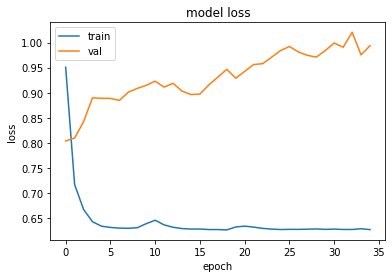

In [114]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [115]:
# summarize history for mean_absolute_error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

KeyError: 'mean_absolute_error'

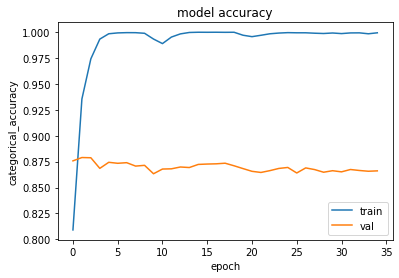

In [116]:
# summarize history for categorical accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
# 將模型儲存至 HDF5 檔案中
classifier.save('p18_d_pbmcinn_12.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
# 將參數儲存至 HDF5 檔案（不含模型）
classifier.save_weights('p18_d_pbmcinn_12_weights.h5')

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred 

In [ ]:
pd_y_pred = pd.DataFrame(y_pred)
pd_y_pred

In [ ]:
np.max(pd_y_pred,axis=1)< 0.5

In [ ]:
sum(np.max(pd_y_pred,axis=1)< 0.5)

In [ ]:
predict_class =np.argmax(y_pred,axis=1)

In [ ]:
len(predict_class)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, predict_class )
confusion_matrix

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predict_class, average='macro')

In [ ]:
print(pd.crosstab(y_test, predict_class, rownames=['Label'], colnames=['predict'],margins = True))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_class))

# Predicting the pbmc set results 

In [ ]:
# 這是human pbmc
test_result = classifier.predict(normalized_pbmc)

In [ ]:
test_result

In [ ]:
result_class =np.argmax(test_result,axis=1)

In [ ]:
result_class_str = labelencoder_y.inverse_transform(result_class)
result_class_str[0:5]

In [ ]:
Counter(result_class_str).most_common()

In [ ]:
barcode  = list(A_frozen.columns) + list(C_frozen.columns) + list(Data6k.columns) + list(Data8k.columns)
barcode[0:10]

In [ ]:
predicted_label = pd.DataFrame({"cellname":barcode, "celltype":result_class_str})
predicted_label 

In [ ]:
predicted_label_A = predicted_label.iloc[0:2900,:]
predicted_label_A

In [ ]:
Counter(predicted_label_A["celltype"]).most_common()

In [ ]:
predicted_label_B = predicted_label.iloc[2900:10683,:]
predicted_label_B

In [ ]:
predicted_label_C = predicted_label.iloc[2900:12419,:]
predicted_label_C

In [ ]:
Counter(predicted_label_C["celltype"]).most_common()

In [ ]:
predicted_label_6K = predicted_label.iloc[12419:17838,:]
predicted_label_6K

In [ ]:
Counter(predicted_label_6K["celltype"]).most_common()


In [ ]:
predicted_label_8K = predicted_label.iloc[17838:26219,:]
predicted_label_8K

In [ ]:
Counter(predicted_label_8K["celltype"]).most_common()

In [ ]:
predicted_label_A.to_csv("p18_d_pbmcinn_11_predicted_label_PBMC_frozen_A.txt", sep="\t", index=False)

In [ ]:
predicted_label_C.to_csv("p18_d_pbmcinn_11_predicted_label_PBMC_frozen_C.txt", sep="\t", index=False)

In [ ]:
predicted_label_6K.to_csv("p18_d_pbmcinn_11_predicted_label_PBMC_frozen_6K.txt", sep="\t", index=False)

In [ ]:
predicted_label_8K.to_csv("p18_d_pbmcinn_11_predicted_label_PBMC_frozen_8K.txt", sep="\t", index=False)